<a href="https://colab.research.google.com/github/Svhugani/QOptics/blob/main/TTCFtest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install qutip

     |████████████████████████████████| 14.6MB 259kB/s 


In [2]:
import qutip as qt
import numpy as np
from matplotlib import pyplot as plt
from google.colab import files

In [5]:
def TTCF_test(times, g, gamma_1, gamma_3, omega, dim):
  I = qt.identity(dim)
  a1 = qt.tensor(qt.destroy(dim),I)
  a2 = qt.tensor(I,qt.destroy(dim))
  A = 30.1
  Gamma_1 = 31
  Gamma_2 = 1.1

  Hamilt = omega * (a1.dag() * a1 + a2.dag() * a2 ) + 1j * g * (a1.dag() * a2 + a2.dag() * a1 )
  L = -1.0j * (qt.spre(Hamilt) - qt.spost(Hamilt))
  L += A * qt.lindblad_dissipator(a1.dag())
  L += Gamma_1 * qt.lindblad_dissipator(a1)
  L += Gamma_2 * qt.lindblad_dissipator(a2)

  SystemMatrix = Hamilt

  collapse = [np.sqrt(A) * a1.dag(), np.sqrt(Gamma_1) * a1, np.sqrt(Gamma_2) * a2]

  #ttcf_1 = qt.correlation_2op_1t(SystemMatrix, None, times, [np.sqrt(0.5 * gamma_1) * a1, np.sqrt(0.5 * gamma_3) * a2], a1.dag(), a1, reverse = True).real
  #ttcf_2 = qt.correlation_2op_1t(SystemMatrix, None, times, [np.sqrt(0.5 * gamma_1) * a1, np.sqrt(0.5 * gamma_3) * a2], a2.dag(), a2, reverse = True).real
  #ttcf_1 = qt.correlation_2op_1t(H = SystemMatrix, state0 = None, taulist = times, c_ops=[], a_op = a1, b_op = a1.dag(), reverse = True).real
  #ttcf_2 = qt.correlation_2op_1t(H = SystemMatrix, state0 = None, taulist = times, c_ops=[] , a_op = a2, b_op = a2.dag(), reverse = True).real

  #ttcf_1 = qt.correlation_2op_1t(H = SystemMatrix, state0 = None, taulist = times, c_ops = collapse, a_op = a1.dag(), b_op = a1, reverse = True)
  #ttcf_2 = qt.correlation_2op_1t(H = SystemMatrix, state0 = None, taulist = times, c_ops = collapse, a_op = a2.dag(), b_op = a2, reverse = True)
  ttcf_1 = qt.correlation_2op_1t(H = SystemMatrix, state0 = None, taulist = times, c_ops = collapse, a_op = a1, b_op = a1.dag(), reverse = True)
  ttcf_2 = qt.correlation_2op_1t(H = SystemMatrix, state0 = None, taulist = times, c_ops = collapse, a_op = a2, b_op = a2.dag(), reverse = True)

  
  if SystemMatrix == L:
    systemName = "Liouviliian"
  elif SystemMatrix == Hamilt:
    systemName = "Hamiltionian"
  else:
    systemName = "---"

  for i in range(len(ttcf_1)):
    #ttcf_1[i] = max(0.0001, ttcf_1[i])
    #ttcf_2[i] = max(0.0001, ttcf_2[i])
    pass

  return [ttcf_1,ttcf_2, systemName]

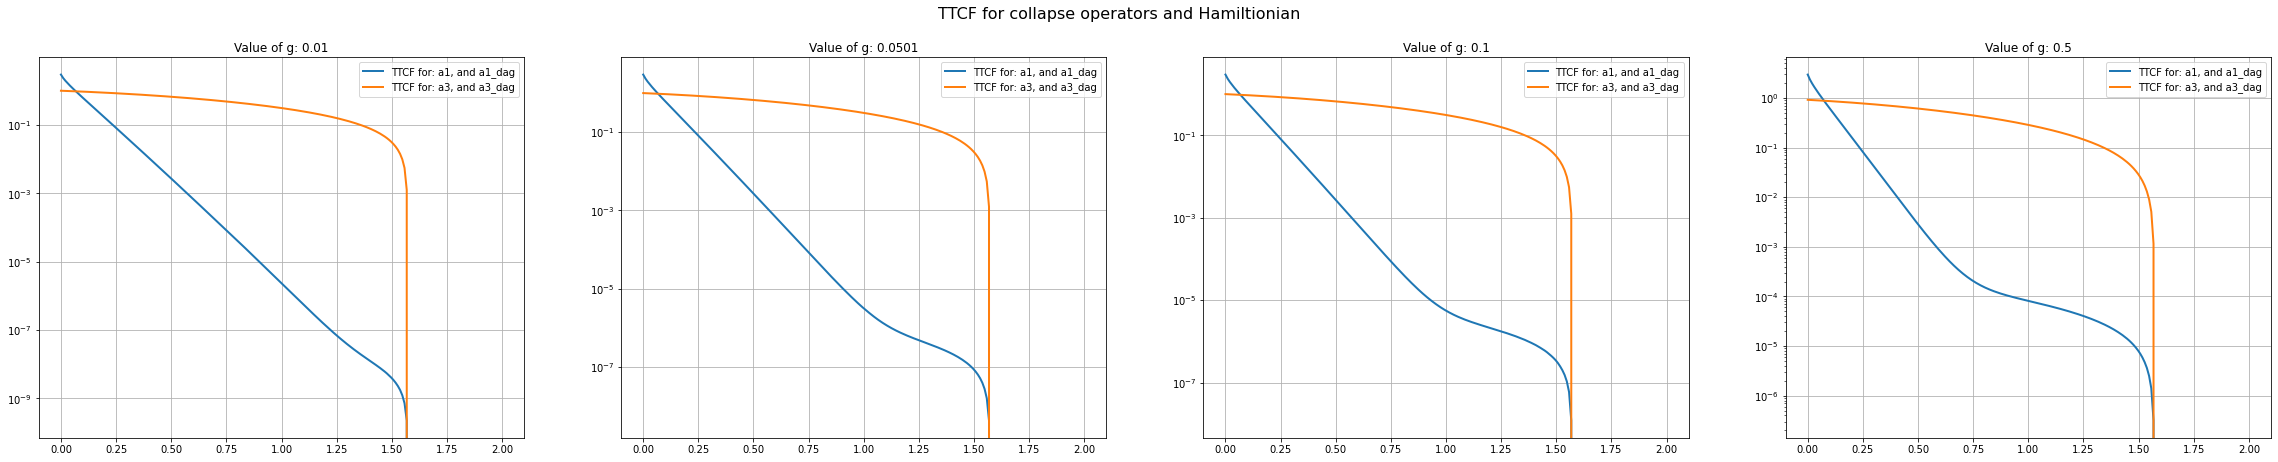

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [6]:
gValues = [0.01, 0.0501, 0.1, .5]
times = np.linspace(0,2,200)
omega = 1
gamma_1 = omega
gamma_3 = 0.5 * omega
dim = 7


fig = plt.figure()
fig.set_size_inches(40, 7)
iterator = 0

for g in gValues:
  iterator += 1
  Corr = TTCF_test(times, g, gamma_1, gamma_3, omega, dim) 
  ax = fig.add_subplot(1, len(gValues), iterator)
  ax.grid()
  ax.legend()
  ax.set_title("Value of g: " + str(g))
  line1 = ax.plot(times, np.real(Corr[0]), linestyle = "solid", linewidth = 2 ,label = "TTCF for: a1, and a1_dag" )
  line2 = ax.plot(times, np.real(Corr[1]), linestyle = "solid", linewidth = 2 ,label = "TTCF for: a3, and a3_dag" ) 
  ax.set_label("subFor" + str(g))
  ax.legend()
  ax.set_yscale("log")

mainTitle = "TTCF for collapse operators and " + str(Corr[2])
fig.suptitle(mainTitle, fontsize=16)
plt.show()
filename = mainTitle + ".png"
fig.savefig(filename)

files.download(filename) 